A01197399 Diana Cadena

A00827619 Marden Camacho

A01721157 Diego Castillo

## Librerías y conexión a Refinitiv

In [18]:
import numpy as np 
import pandas as pd 
import random 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import math 
from datetime import datetime, timedelta, date
from sklearn import preprocessing

import eikon as ek

from tqdm import tqdm_notebook , tqdm 
from collections import deque 

In [19]:
plt.style.use('dark_background')

In [20]:
ek.set_app_key('f2aff757d4f54e188cfbb43bb821cbce3ec23d2d')

## Datos activo financiero: Mediatek

In [21]:
inst = '2454.TW'
f_inicio = '2023-08-08'
f_fin = '2023-11-24'

In [22]:
data = ek.get_timeseries(inst, start_date=f_inicio, end_date=f_fin, fields=['CLOSE'])
data

2454.TW,CLOSE
Date,
2023-08-08,690
2023-08-09,701
2023-08-10,693
2023-08-11,679
2023-08-14,672
...,...
2023-11-20,912
2023-11-21,926
2023-11-22,942


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76 entries, 2023-08-08 to 2023-11-24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   CLOSE   76 non-null     Int64
dtypes: Int64(1)
memory usage: 1.3 KB


In [24]:
data.describe()

2454.TW,CLOSE
count,76.0
mean,783.802632
std,83.091118
min,669.0
25%,710.0
50%,772.5
75%,843.0
max,945.0


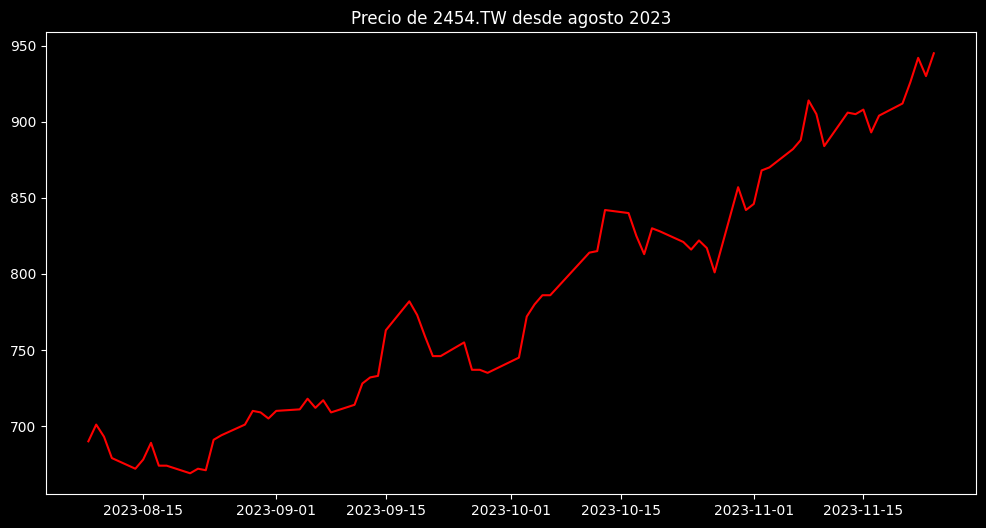

In [17]:
fig = plt.figure(figsize=(12, 6))
plt.title('Precio de '+ inst +' desde agosto 2023')

plt.plot(data, color='red');

## Indicadores alfa

### Funciones

In [25]:
# promedios móviles simples
def sma(instrumento, fecha_inicio, fecha_final, ventana):
    df = pd.DataFrame()
    data = ek.get_timeseries(instrumento, start_date=fecha_inicio, end_date=fecha_final, fields=['CLOSE'])
    df['SMA'+str(ventana)] = data['CLOSE'].rolling(ventana).mean()

    return df

In [26]:
# promedios móviles exponenciales
def ema(instrumento, fecha_inicio, fecha_final, ventana):
    df = pd.DataFrame()
    data = ek.get_timeseries(instrumento, start_date=fecha_inicio, end_date=fecha_final, fields=['CLOSE'])
    df['EMA'+str(ventana)] = data['CLOSE'].ewm(ventana, adjust=False).mean()

    return df

### Indicadores

In [28]:
d_ind = pd.DataFrame()

ventanas = [5, 15, 21, 30, 63, 180, 252]
fecha = date(2023,8,8)

In [29]:
for i in range(len(ventanas)):
    f_in_sma = fecha - timedelta(ventanas[i]*2)
    inicio = f_in_sma.strftime('%Y-%m-%d')
    d_ind['SMA'+str(ventanas[i])] = sma(inst, inicio, f_fin, ventanas[i])

d_ind=d_ind[d_ind.index.isin(data.index)]

In [30]:
for i in range(len(ventanas)):
    d_ind['EMA'+str(ventanas[i])] = ema(inst, f_inicio, f_fin, ventanas[i])

In [31]:
d_ind

,SMA5,SMA15,SMA21,SMA30,SMA63,SMA180,SMA252,EMA5,EMA15,EMA21,EMA30,EMA63,EMA180,EMA252
Date,,,,,,,,,,,,,,
2023-08-08,704.8,685.200000,684.619048,686.566667,707.253968,711.027778,686.531746,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
2023-08-09,702.4,686.400000,685.952381,687.233333,707.634921,711.605556,686.583333,691.833333,690.687500,690.500000,690.354839,690.171875,690.060773,690.043478
2023-08-10,699.2,686.200000,686.285714,687.166667,708.031746,712.011111,686.630952,692.027778,690.832031,690.613636,690.440166,690.216064,690.077012,690.055164
2023-08-11,693.8,685.333333,686.000000,686.600000,708.206349,712.338889,686.638889,689.856481,690.092529,690.085744,690.071129,690.040813,690.015813,690.011468
2023-08-14,687.0,684.666667,685.619048,686.066667,708.190476,712.461111,686.599206,686.880401,688.961746,689.263665,689.488189,689.758926,689.916278,689.940276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-20,904.4,888.466667,869.571429,855.133333,788.507937,741.988889,729.051587,894.294428,854.062511,834.102016,810.756496,764.253741,720.885807,712.690386
2023-11-21,908.6,894.066667,874.571429,859.800000,792.587302,743.116667,730.345238,899.578690,858.558604,838.279197,814.474028,766.781026,722.019034,713.533507
2023-11-22,915.4,900.466667,880.571429,864.066667,796.873016,743.955556,731.714286,906.648908,863.773691,842.993779,818.587769,769.518823,723.234399,714.436537


## *Reinforcement Learning*

### Funciones

In [32]:
class AI_Trader():
  
  def __init__(self, indi, action_space=3, model_name="AITrader"): #Stay, Buy, Sell
    
    self.indi = indi
    self.action_space = action_space
    self.memory = deque(maxlen=2000)
    self.inventory = []
    self.model_name = model_name
    
    # Define hyperparamaters
    self.gamma = 0.95
    self.epsilon = 1.0
    self.epsilon_final = 0.01
    self.epsilon_decay = 0.995
        
    # Call a function  to build a model trought this class constructor
    # More parameters could be ustilized to programaticaly define network size (layers and neurons)
    self.model = self.model_builder()
    
    
  def model_builder(self):
    metrics = [tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.FalseNegatives(), tf.keras.metrics.Accuracy()]
    model = tf.keras.models.Sequential()    
    model.add(tf.keras.layers.Dense(units=32, activation='relu', input_dim=self.indi))    
    model.add(tf.keras.layers.Dense(units=64, activation='relu'))    
    model.add(tf.keras.layers.Dense(units=128, activation='relu'))    
    model.add(tf.keras.layers.Dense(units=self.action_space, activation='linear'))    
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=metrics)
    return model
  
  
  
  
  # Trade function that takes state as an input and returns an action 
  # to perform in perticular state 
  def trade(self, state):
    
    # Should we perform a random generated action or action defined in model?
    
    # If value from our random generator is smaller or equal to our epsilon 
    #     then we will retun a random action from action_space [0-3)
    if random.random() <= self.epsilon:
      return random.randrange(self.action_space)
    
    # If our random is greater than epsilon then we will use model to perform action
    actions = self.model.predict(state)
    # return only a one number defining an action (#Stay - 0 , Buy - 1, Sell - 2) 
    #    that has maximum probability
    return np.argmax(actions[0])
  
  
  
  def batch_train(self, batch_size):
    
    batch = []
    
    # Iterrate in momory, we do not want to randolmy select data as we are dealing with 
    #    time constraint data. We will always sample from the end of memory size of bath
    for i in range(len(self.memory) - batch_size + 1, len(self.memory)):
      # insert data from memory to batch      
      batch.append(self.memory[i])
    
    
    # Iterate trought batch of data and train the model for each sample from batch
    # Order of variables in for loop is important
    for state, action, reward, next_state, done in batch:
      # Reward if agent is in terminal state
      reward = reward
      # Check that agent is not in terminal state
      # If not in terminal state calculate reward for actions that could be played
      if not done:
        # Discounted total reward:
        reward = reward + self.gamma * np.amax(self.model.predict(next_state)[0])        
      # Target variable that is predicted by the model (action)
      target = self.model.predict(state)
      target[0][action] = reward
      
      self.model.fit(state, target, epochs=1, verbose=0)
      
    # We will decrease epsilon parameter that is 1 as defined in __init__  so
    #    so we can stop performing random actions at some point
    if self.epsilon > self.epsilon_final:
      self.epsilon *= self.epsilon_decay

In [33]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [34]:
def stocks_price_format(n):
  if n < 0:
    return "- $ {0:2f}".format(abs(n))
  else:
    return "$ {0:2f}".format(abs(n))

In [35]:
def state_creator(data, timestep, window_size):
  
  # starting day of our state
  starting_id = timestep - window_size + 1
  
  if starting_id >= 0:
    windowed_data = data[starting_id:timestep+1]
  else:
    # Replicate member (data[0]) needed times
    windowed_data = - starting_id * [data[0]] + list(data[0:timestep+1])
    
  state = []
  # Iterate trough whole windowed_data minus current state (-1)
  for i in range(window_size - 1):
    # Normalize the difference from current day and the next day
    # Because the prices can be very different and we want them on same scale
    state.append(sigmoid(windowed_data[i+1] - windowed_data[i]))
    
  return np.array([state])

In [36]:
def indicadores_state(indic, timestep):
    x = indic.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    indicadores2 = pd.DataFrame(x_scaled)
    return np.array([indicadores2.loc[timestep, :].values.flatten().tolist()])

### Proceso

In [37]:
state_creator(data.CLOSE, 20, 10)

array([[1.        , 0.95257413, 0.99908895, 0.99987661, 0.26894142,
        0.01798621, 0.99330715, 0.73105858, 0.99908895]])

In [38]:
indicadores_state(d_ind, 0)

array([[0.12664093, 0.00883392, 0.01248298, 0.01893805, 0.10544662,
        0.02662307, 0.00947594, 0.05248285, 0.03285472, 0.02847663,
        0.02493731, 0.02041542, 0.01771791, 0.01730586]])

In [39]:
indi = 14
batch_size = 32
data_samples = len(data) - 1 

In [40]:
trader = AI_Trader(indi)
trader.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                480       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 11299 (44.14 KB)
Trainable params: 11299 (44.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
episode = 1
state = indicadores_state(indic=d_ind, timestep=0)
total_profit = []
trader.inventory = []
trader.memory = deque(maxlen=2000)

df_historia = pd.DataFrame({'Fecha': [],
                            'Precio': [],
                            'Accion': [],
                            'Ganancia_total': []})

for t in tqdm(range(76)):
# First we will access action that is going to be taken by model
    days_back = 15
    reset = datetime.now() - timedelta(days=days_back)
    if data.index[t].strftime("%Y-%m-%d") == reset.strftime("%Y-%m-%d"):
        trader.inventory = []
        total_profit = []
    else:
        pass
        
    action = trader.trade(state)
    
    # Use action to get to next state(t+)
    next_state = indicadores_state(indic=d_ind, timestep=t)
    # As we did not calculate anything up to this point reward is 0
    reward = 0
    
    if action == 1 and len(trader.inventory) == 0: #Buying
      # Put buyed stock to inventory to trade with
      trader.inventory.append(data.CLOSE[t])
      df_compra = pd.DataFrame({'Fecha': [data.index.values[t]],
                                  'Precio': [data.CLOSE[t]],
                                  'Accion': [action]})
      df_historia = pd.concat([df_historia, df_compra])
      print("AI Trader bought: ", stocks_price_format(data.CLOSE[t]))
      
    # To sell we need to have something in inventory  
    elif action == 2 and len(trader.inventory) > 0: #Selling
      # Check buy price, pop removes first value from list
      buy_price = trader.inventory.pop(0)
      
      # If we gain money (current price - buy price) we have reward 
      #    if we lost money then reward is 0
      reward = max(data.CLOSE[t] - buy_price, 0)
      total_profit += data.CLOSE[t] - buy_price
      df_compra = pd.DataFrame({'Fecha': [data.index.values[t]],
                                  'Precio': data.CLOSE[t],
                                  'Accion': [action],
                                  'Ganancia_total': [stocks_price_format(data.CLOSE[t] - buy_price)]})
      df_historia = pd.concat([df_historia, df_compra])
      print("AI Trader sold: ", stocks_price_format(data.CLOSE[t]), " Profit: " + stocks_price_format(data.CLOSE[t] - buy_price))
      
    # if t is last sample in our dateset we are done
    #     we do not have any steps to perform in current episode
    if t == data_samples - 1:
      done = True
    else:
      done = False
    
    # Append all data to trader-agent memory, experience buffer
    trader.memory.append((state, action, reward, next_state, done))
    
    # change state to next state, so we are done with an episode
    state = next_state
    
    if done:
      print("########################")
      print("TOTAL PROFIT: {}".format(total_profit))
      print("########################")
    
    # Chekc if we have more information in our memory than batch size
    if len(trader.memory) > batch_size:
      trader.batch_train(batch_size)
  
  # Save the model every 10 episodes
    if episode % 10 == 0:
      trader.model.save("ai_trader_{}.h5".format(episode))

 22%|██▏       | 17/76 [00:00<00:00, 137.89it/s]

AI Trader bought:  $ 701.000000
AI Trader sold:  $ 679.000000  Profit: - $ 22.000000
AI Trader bought:  $ 672.000000
AI Trader sold:  $ 689.000000  Profit: $ 17.000000
AI Trader bought:  $ 674.000000
AI Trader sold:  $ 672.000000  Profit: - $ 2.000000
AI Trader bought:  $ 691.000000
AI Trader sold:  $ 701.000000  Profit: $ 10.000000
AI Trader bought:  $ 710.000000
AI Trader sold:  $ 709.000000  Profit: - $ 1.000000
AI Trader bought:  $ 714.000000
AI Trader sold:  $ 728.000000  Profit: $ 14.000000


 41%|████      | 31/76 [00:00<00:00, 96.39it/s] 

AI Trader bought:  $ 732.000000
AI Trader sold:  $ 773.000000  Profit: $ 41.000000
AI Trader bought:  $ 746.000000
1/1 [==============================] - 0s 32ms/step


 41%|████      | 31/76 [00:19<00:00, 96.39it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▍     | 34/76 [00:27<00:54,  1.30s/it]

AI Trader sold:  $ 755.000000  Profit: $ 9.000000
1/1 [==============================] - 0s 31ms/step


 46%|████▌     | 35/76 [00:37<01:14,  1.82s/it]

AI Trader bought:  $ 737.000000
1/1 [==============================] - 0s 30ms/step


 46%|████▌     | 35/76 [00:50<01:14,  1.82s/it]

1/1 [==============================] - 0s 30ms/step


 49%|████▊     | 37/76 [00:59<02:07,  3.27s/it]

AI Trader sold:  $ 735.000000  Profit: - $ 2.000000
1/1 [==============================] - 0s 46ms/step


 50%|█████     | 38/76 [01:10<02:31,  4.00s/it]

1/1 [==============================] - 0s 34ms/step


 51%|█████▏    | 39/76 [01:21<03:01,  4.92s/it]

AI Trader bought:  $ 772.000000
1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 40/76 [01:32<03:26,  5.75s/it]

1/1 [==============================] - 0s 29ms/step


 54%|█████▍    | 41/76 [01:41<03:42,  6.36s/it]

1/1 [==============================] - 0s 30ms/step


 54%|█████▍    | 41/76 [02:00<03:42,  6.36s/it]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 43/76 [02:01<04:09,  7.55s/it]

AI Trader sold:  $ 814.000000  Profit: $ 42.000000
1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 44/76 [02:10<04:13,  7.91s/it]

AI Trader bought:  $ 815.000000
1/1 [==============================] - 0s 37ms/step


 58%|█████▊    | 44/76 [02:30<04:13,  7.91s/it]

1/1 [==============================] - 0s 129ms/step


 61%|██████    | 46/76 [02:31<04:23,  8.77s/it]

AI Trader sold:  $ 840.000000  Profit: $ 25.000000
1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 47/76 [02:41<04:23,  9.07s/it]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 48/76 [02:52<04:24,  9.43s/it]

1/1 [==============================] - 0s 31ms/step


 64%|██████▍   | 49/76 [03:02<04:22,  9.73s/it]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 50/76 [03:12<04:13,  9.76s/it]

AI Trader bought:  $ 828.000000
1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 50/76 [03:30<04:13,  9.76s/it]

1/1 [==============================] - 0s 33ms/step


 68%|██████▊   | 52/76 [03:31<03:52,  9.70s/it]

1/1 [==============================] - 0s 31ms/step


 70%|██████▉   | 53/76 [03:41<03:44,  9.77s/it]

1/1 [==============================] - 0s 34ms/step


 71%|███████   | 54/76 [03:53<03:42, 10.13s/it]

AI Trader sold:  $ 817.000000  Profit: - $ 11.000000
1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 55/76 [04:04<03:38, 10.38s/it]

1/1 [==============================] - 0s 28ms/step


 74%|███████▎  | 56/76 [04:14<03:28, 10.43s/it]

AI Trader bought:  $ 857.000000
1/1 [==============================] - 0s 28ms/step


 75%|███████▌  | 57/76 [04:26<03:23, 10.71s/it]

1/1 [==============================] - 0s 31ms/step


 76%|███████▋  | 58/76 [04:36<03:08, 10.50s/it]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 59/76 [04:46<02:57, 10.47s/it]

AI Trader sold:  $ 868.000000  Profit: $ 11.000000
1/1 [==============================] - 0s 30ms/step


 79%|███████▉  | 60/76 [04:56<02:45, 10.34s/it]

1/1 [==============================] - 0s 32ms/step


 80%|████████  | 61/76 [05:06<02:34, 10.31s/it]

1/1 [==============================] - 0s 51ms/step


 82%|████████▏ | 62/76 [05:25<03:00, 12.87s/it]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 63/76 [05:37<02:43, 12.58s/it]

AI Trader bought:  $ 914.000000
1/1 [==============================] - 0s 30ms/step


 84%|████████▍ | 64/76 [05:52<02:37, 13.16s/it]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 65/76 [06:02<02:15, 12.33s/it]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 66/76 [06:12<01:56, 11.62s/it]

1/1 [==============================] - 0s 89ms/step


 88%|████████▊ | 67/76 [06:25<01:48, 12.07s/it]

1/1 [==============================] - 0s 30ms/step


 89%|████████▉ | 68/76 [06:37<01:36, 12.02s/it]

1/1 [==============================] - 0s 39ms/step


 91%|█████████ | 69/76 [06:51<01:27, 12.45s/it]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 70/76 [07:09<01:26, 14.34s/it]

AI Trader bought:  $ 904.000000
1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 71/76 [07:23<01:10, 14.15s/it]

1/1 [==============================] - 0s 70ms/step


 95%|█████████▍| 72/76 [07:33<00:52, 13.03s/it]

1/1 [==============================] - 0s 116ms/step


 96%|█████████▌| 73/76 [07:47<00:39, 13.31s/it]

AI Trader sold:  $ 942.000000  Profit: $ 38.000000
1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 74/76 [07:59<00:25, 12.88s/it]

AI Trader bought:  $ 930.000000
########################
TOTAL PROFIT: []
########################
1/1 [==============================] - 0s 38ms/step


 99%|█████████▊| 75/76 [08:08<00:11, 11.64s/it]

1/1 [==============================] - 0s 30ms/step


100%|██████████| 76/76 [08:16<00:00,  6.54s/it]


## Comparación

In [42]:
df_historia[-20:]

,Fecha,Precio,Accion,Ganancia_total
0,2023-09-11,714.0,1.0,NaN
0,2023-09-12,728.0,2.0,$ 14.000000
0,2023-09-13,732.0,1.0,NaN
0,2023-09-19,773.0,2.0,$ 41.000000
0,2023-09-21,746.0,1.0,NaN
0,2023-09-25,755.0,2.0,$ 9.000000
0,2023-09-26,737.0,1.0,NaN
0,2023-09-28,735.0,2.0,- $ 2.000000
0,2023-10-03,772.0,1.0,NaN
0,2023-10-11,814.0,2.0,$ 42.000000


### Visualización

In [43]:
datos_finales = df_historia.dropna()
datos_finales = datos_finales[['Fecha', 'Ganancia_total']]

datos_finales = datos_finales.set_index('Fecha')
datos_finales

,Ganancia_total
Fecha,
2023-08-11,- $ 22.000000
2023-08-16,$ 17.000000
2023-08-22,- $ 2.000000
2023-08-28,$ 10.000000
2023-08-30,- $ 1.000000
2023-09-12,$ 14.000000
2023-09-19,$ 41.000000
2023-09-25,$ 9.000000
2023-09-28,- $ 2.000000


In [97]:
def str_to_int(datos):
    datos_nuevos = []
    for i in range(len(datos)):
        if datos[i][:2]=='- ':
            x = -int(float(datos[i][3:]))
        else:
            x = int(float(datos[i][1:]))
        datos_nuevos.append(x)
    return datos_nuevos

In [100]:
datos_finales['G_int'] = str_to_int(datos_finales.Ganancia_total.values)

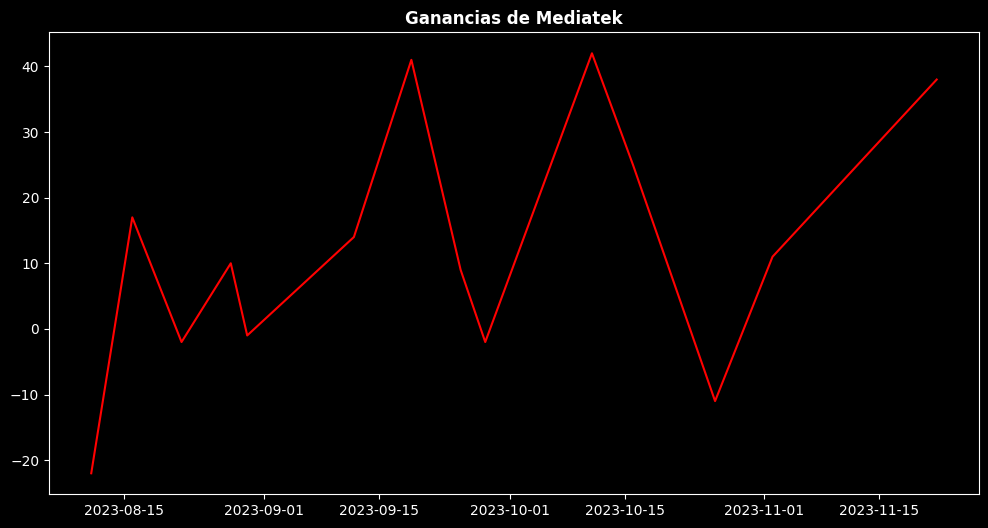

In [102]:
fig = plt.figure(figsize=(12, 6))
plt.title('Ganancias de Mediatek', weight='bold')

plt.plot(datos_finales.G_int, color='red');

In [106]:
datos_finales.G_int[-1]*3290.7482 # * cantidad de acciones compradas al inicio

125048.4316

### Portafolio

In [108]:
mt1 = pd.read_csv('MDDCapital.csv')
p_inicial = mt1['Current Value [PT_CURRENT_VALUE]'].iloc[0]

mt2 = pd.read_csv('MDDCapital9.csv')
p_final = mt2['Current Value [PT_CURRENT_VALUE]'].iloc[2]

print('Inversión inicial (TWD): ', p_inicial, '\nInversión actual (TWD): ', p_final)
print('Ganancia (TWD): ', p_final-p_inicial)

Inversión inicial (TWD):  2418699.927 
Inversión actual (TWD):  3063686.5742
Ganancia (TWD):  644986.6472


In [109]:
datos_portafolio = [p_inicial, p_final]
fechas_portafolio = ['2023-09-25', '2023-11-24']
p_usd = [mt1['Current Value (USD) [PT_CURRENT_VALUE_BC]'][0], mt2['Current Value (USD) [PT_CURRENT_VALUE_BC]'][2]]

In [110]:
df_port = pd.DataFrame()
df_port['Date']=fechas_portafolio
df_port['Precio']=datos_portafolio
df_port['Precio_USD'] = p_usd
df_port = df_port.set_index('Date')

In [111]:
df_port

,Precio,Precio_USD
Date,,
2023-09-25,2.418700e+06,74975.1992
2023-11-24,3.063687e+06,97093.4453


In [67]:
print('TWD/USD inicial: ', round(df_port.Precio[0]/df_port.Precio_USD[0],2))
print('TWD/USD final: ', round(df_port.Precio[1]/df_port.Precio_USD[1],2))

TWD/USD inicial:  32.26
TWD/USD final:  31.55


In [112]:
x = df_port.Precio[1]/32.26
df_port['Precio_CF'] = [df_port.Precio_USD[0], x]
df_port

,Precio,Precio_USD,Precio_CF
Date,,,
2023-09-25,2.418700e+06,74975.1992,74975.199200
2023-11-24,3.063687e+06,97093.4453,94968.585685


In [71]:
print('Rendimiento debido al cambio de moneda: ', round(100-(94968.5856850589*100)/97093.4453, 4),'%')

Rendimiento debido al cambio de moneda:  2.1885 %


In [74]:
print('Rendimiento: $', round(df_port.Precio_USD[1]-df_port.Precio_USD[0], 4), 'USD')

Rendimiento: $ 22118.2461 USD


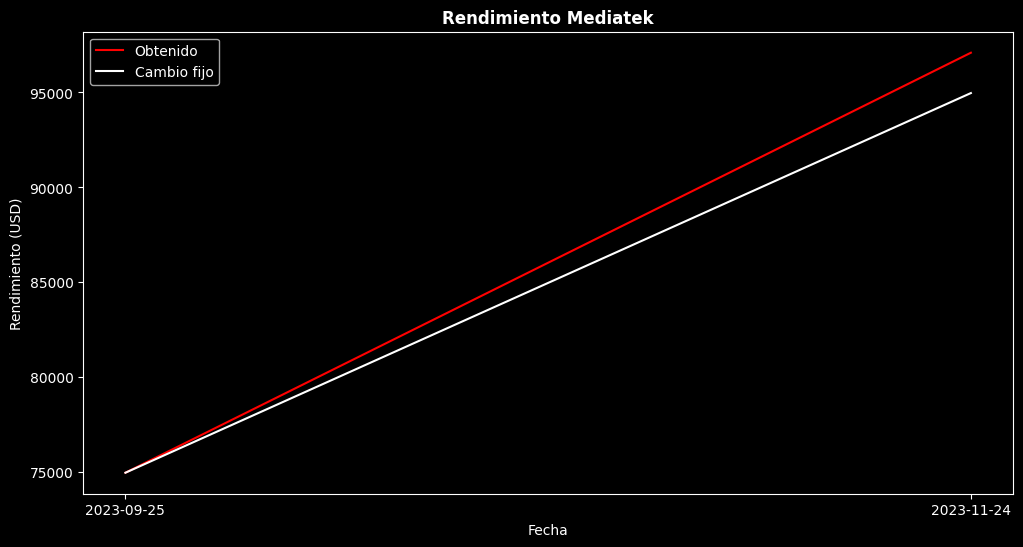

In [113]:
fig = plt.figure(figsize=(12, 6))
plt.title('Rendimiento Mediatek', weight='bold')

plt.plot(df_port.Precio_USD, color='red', label='Obtenido');
plt.plot(df_port.Precio_CF, color='white', label='Cambio fijo');
plt.xlabel('Fecha');
plt.ylabel('Rendimiento (USD)');
plt.legend();